#Sudoku 4*4 Puzzle

In [1]:
import random
from collections import defaultdict
import numpy as np

##**MDP Class**

In [2]:
class SudokuMDP:
    """A Markov Decision Process for solving a 4x4 Sudoku puzzle. This class defines the state space, reward function, and transition model for the 4x4 Sudoku problem, fulfilling the State Space Representation task."""

    def __init__(self, initial_state, gamma=0.9):
        self.init = initial_state  # Initial 4x4 Sudoku grid
        self.states = self.generate_states()
        self.gamma = gamma
        self.terminals = [self.is_goal_state(state) for state in self.states]
        self.actions = self.generate_actions


    def possible_states(self):
        """Generates placeholder states for the Sudoku board."""
        return [self.init]

    def generate_states(self):
        """This method generates all possible states for the Sudoku board, helping to define the state space."""
        return [tuple([tuple(row) for row in state]) for state in self.possible_states()]

    def generate_actions(self, state):
        """This method specifies the possible actions for a given state, fulfilling the Action Set task."""
        actions = []
        for i in range(4):
            for j in range(4):
                if state[i][j] == 0:  # If the cell is empty
                    for value in range(1, 5):
                        if self.is_valid_move(state, i, j, value):
                            actions.append((i, j, value))
        return actions

    def is_valid_move(self, state, row, col, value):
        """This method checks if placing a specific value in a cell is valid according to Sudoku rules."""
        # Check row
        if value in state[row]:
            return False
        # Check column
        if value in [state[i][col] for i in range(4)]:
            return False
        # Check 2x2 grid
        grid_row, grid_col = row // 2, col // 2
        for i in range(grid_row * 2, grid_row * 2 + 2):
            for j in range(grid_col * 2, grid_col * 2 + 2):
                if state[i][j] == value:
                    return False
        return True

    def is_goal_state(self, state):
        """This method checks if the current state is a completed and valid Sudoku board, defining the goal state."""
        for row in state:
            if len(set(row)) != 4 or 0 in row:
                return False
        for col in zip(*state):
            if len(set(col)) != 4:
                return False
        return True

    def R(self, state):
        """This method defines the reward function, giving high rewards for completing the puzzle and penalties for inefficient moves, fulfilling the Reward Function task."""
        if self.is_goal_state(state):
            return 100  # High reward for completing the puzzle
        return -1  # Penalty for each step to encourage efficiency

    def T(self, state, action):
        """Transition model for applying an action to the state."""
        row, col, value = action
        new_state = [list(row) for row in state]
        new_state[row][col] = value
        return tuple(tuple(row) for row in new_state)


##**QLearning Agent**

In [3]:
# Implement Q-Learning based on the SudokuMDP
class QLearningAgent:
    """This class implements Q-learning, including exploration-exploitation strategies and Q-value updates, fulfilling the Q-Learning Setup task."""

    def __init__(self, mdp, Ne=5, Rplus=2, alpha=None):
        self.mdp = mdp
        self.gamma = mdp.gamma
        self.Ne = Ne
        self.Rplus = Rplus
        self.Q = defaultdict(float)
        self.Nsa = defaultdict(float)
        self.alpha = alpha or (lambda n: 1.0 / (1 + n))

    def f(self, u, n):
        """This method implements the exploration function for Q-learning."""
        return self.Rplus if n < self.Ne else u

    def __call__(self, state):
        """This method determines the best action to take in a given state based on the Q-values and exploration strategy."""
        actions = self.mdp.generate_actions(state)
        if not actions:
            return None  # No valid actions
        return max(actions, key=lambda a: self.f(self.Q[state, a], self.Nsa[state, a]))

    def learn(self, state, action, reward, next_state):
        """This method updates the Q-values using the Q-learning formula, incorporating the learning rate and discount factor."""
        self.Nsa[state, action] += 1
        next_actions = self.mdp.generate_actions(next_state)
        max_q = max([self.Q[next_state, a] for a in next_actions], default=0)
        self.Q[state, action] += self.alpha(self.Nsa[state, action]) * (
            reward + self.gamma * max_q - self.Q[state, action]
        )


In [4]:
# Example usage
initial_sudoku = (
    (0, 0, 0, 0),
    (0, 0, 0, 0),
    (0, 0, 0, 0),
    (0, 0, 0, 0),
)

sudoku_mdp = SudokuMDP(initial_sudoku)
agent = QLearningAgent(sudoku_mdp)


# Train the agent
for episode in range(1000):  # This loop trains the agent by allowing it to interact with the environment, fulfilling the Training the Agent task.
    state = sudoku_mdp.init
    while not sudoku_mdp.is_goal_state(state):
        action = agent(state)
        if action is None:
            break
        next_state = sudoku_mdp.T(state, action)
        reward = sudoku_mdp.R(next_state)
        agent.learn(state, action, reward, next_state)
        state = next_state

print("Training complete. Q-values:")
for state, actions in agent.Q.items():
    print(f"State {state}: {actions}")

Streaming output truncated to the last 5000 lines.
State (((3, 2, 1, 4), (4, 1, 3, 0), (0, 0, 0, 0), (0, 0, 0, 0)), (3, 2, 4)): 0.0
State (((3, 2, 1, 4), (4, 1, 3, 0), (0, 0, 0, 0), (0, 0, 0, 0)), (3, 3, 1)): 0.0
State (((3, 2, 1, 4), (4, 1, 3, 0), (0, 0, 0, 0), (0, 0, 0, 0)), (3, 3, 2)): 0.0
State (((3, 2, 1, 4), (4, 1, 3, 0), (0, 0, 0, 0), (0, 0, 0, 0)), (3, 3, 3)): 0.0
State (((3, 2, 1, 4), (4, 1, 3, 2), (0, 0, 0, 0), (0, 0, 0, 0)), (2, 0, 1)): -0.6666666666666666
State (((3, 2, 1, 4), (4, 1, 3, 2), (0, 0, 0, 0), (0, 0, 0, 0)), (2, 0, 2)): 0.0
State (((3, 2, 1, 4), (4, 1, 3, 2), (0, 0, 0, 0), (0, 0, 0, 0)), (2, 1, 3)): 0.0
State (((3, 2, 1, 4), (4, 1, 3, 2), (0, 0, 0, 0), (0, 0, 0, 0)), (2, 1, 4)): 0.0
State (((3, 2, 1, 4), (4, 1, 3, 2), (0, 0, 0, 0), (0, 0, 0, 0)), (2, 2, 2)): 0.0
State (((3, 2, 1, 4), (4, 1, 3, 2), (0, 0, 0, 0), (0, 0, 0, 0)), (2, 2, 4)): 0.0
State (((3, 2, 1, 4), (4, 1, 3, 2), (0, 0, 0, 0), (0, 0, 0, 0)), (2, 3, 1)): 0.0
State (((3, 2, 1, 4), (4, 1, 3, 2), (0, 0,

##**Reinforcement Learning**

In [5]:
class QLearningAgent:
    """Implementation of Q-learning."""

    def __init__(self, environment, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.env = environment
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate
        self.Q = defaultdict(float)  # Initialize Q-values

    def choose_action(self, state):
        """Chooses an action using epsilon-greedy strategy."""
        actions = self.env.generate_actions(state)  # Retrieve valid actions for the current state
        if not actions:
            return None  # If no actions available, return None
        if random.uniform(0, 1) < self.epsilon:  # Exploration
            return random.choice(actions)  # Choose a random action
        return max(actions, key=lambda a: self.Q[(state, a)])  # Exploitation: Choose the best-known action

    def learn(self, state, action, reward, next_state):
        """Updates Q-values using the Q-learning formula."""
        next_actions = self.env.generate_actions(next_state)  # Get possible actions for the next state
        max_next_q = max([self.Q[(next_state, a)] for a in next_actions], default=0)  # Max Q-value for next state
        # Update Q-value for the current state-action pair
        self.Q[(state, action)] += self.alpha * (
            reward + self.gamma * max_next_q - self.Q[(state, action)]
        )

def train_agent(agent, environment, episodes=1000):
    """Trains the Q-learning agent."""
    for episode in range(episodes):
        state = environment.init  # Start from the initial state
        while not environment.is_goal_state(state):  # Continue until the goal state is reached
            action = agent.choose_action(state)  # Select an action using epsilon-greedy strategy
            if action is None:  # If no valid action, terminate the episode
                break
            next_state = environment.T(state, action)  # Transition to the next state
            reward = environment.R(next_state)  # Get reward for the new state
            agent.learn(state, action, reward, next_state)  # Update Q-values based on the experience
            state = next_state  # Update the current state
        if episode % (episodes // 10) == 0:  # Periodically monitor progress
            print(f"Episode {episode}: Training in progress.")
    print("Training complete.")

def monitor_performance(agent):
    """Prints Q-values for performance monitoring."""
    print("Q-values after training:")
    for (state, action), value in agent.Q.items():
        print(f"State: {state}, Action: {action}, Q-value: {value:.2f}")


In [6]:
# Main execution
initial_state = (
    (0, 0, 0, 0),
    (0, 0, 0, 0),
    (0, 0, 0, 0),
    (0, 0, 0, 0),
)

sudoku_mdp = SudokuMDP(initial_state)  # Initialize the Sudoku environment
agent = QLearningAgent(sudoku_mdp)  # Initialize the Q-learning agent

# Train and monitor performance
train_agent(agent, sudoku_mdp, episodes=1000)  # Train the agent with 1000 episodes
monitor_performance(agent)  # Display the learned Q-values

Streaming output truncated to the last 5000 lines.
State: ((4, 2, 1, 0), (0, 3, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)), Action: (2, 3, 3), Q-value: 0.00
State: ((4, 2, 1, 0), (0, 3, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)), Action: (2, 3, 4), Q-value: 0.00
State: ((4, 2, 1, 0), (0, 3, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)), Action: (3, 0, 1), Q-value: 0.00
State: ((4, 2, 1, 0), (0, 3, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)), Action: (3, 0, 2), Q-value: 0.00
State: ((4, 2, 1, 0), (0, 3, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)), Action: (3, 0, 3), Q-value: 0.00
State: ((4, 2, 1, 0), (0, 3, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)), Action: (3, 1, 1), Q-value: 0.00
State: ((4, 2, 1, 0), (0, 3, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)), Action: (3, 1, 4), Q-value: 0.00
State: ((4, 2, 1, 0), (0, 3, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)), Action: (3, 2, 2), Q-value: 0.00
State: ((4, 2, 1, 0), (0, 3, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)), Action: (3, 2, 3), Q-value: 0.00
State: ((4, 2, 1, 0), (0, 3, 0, 0), (0, 0, 0, 0), (0, 0, 0, 0)), Ac

##**Visulaization**

Step 1: Taking action (2, 2, 1)


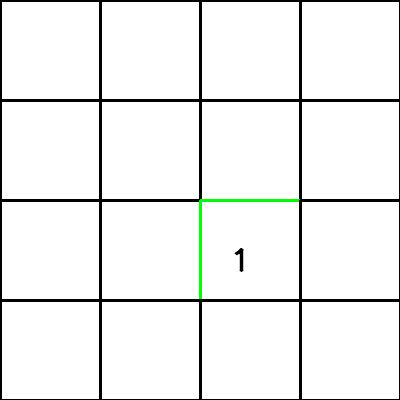

Step 2: Taking action (0, 3, 3)


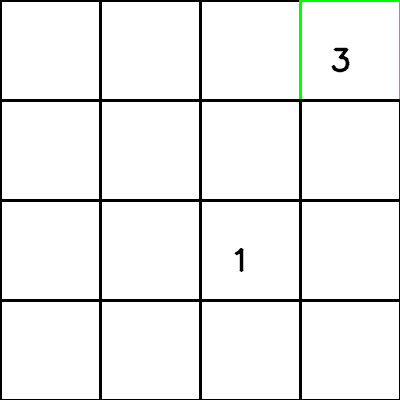

Step 3: Taking action (0, 0, 1)


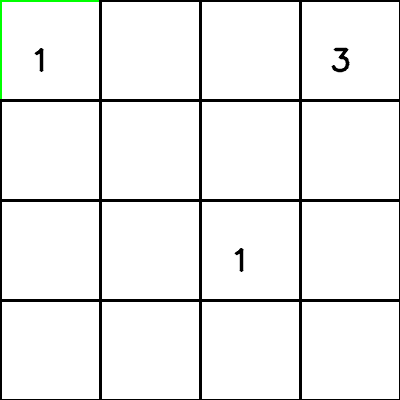

Step 4: Taking action (0, 1, 2)


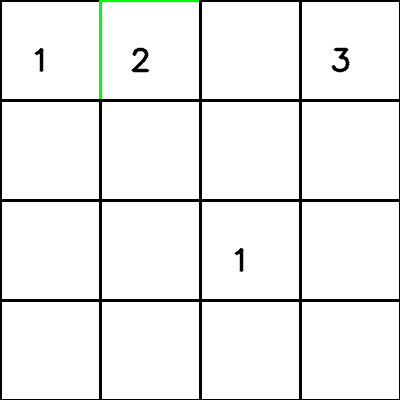

Step 5: Taking action (0, 2, 4)


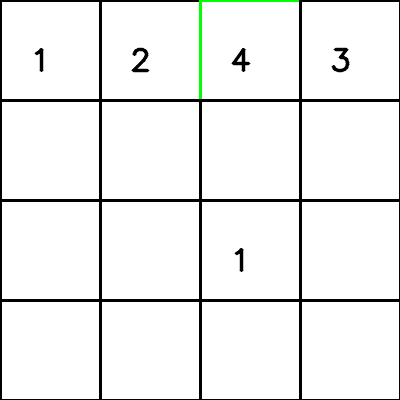

Step 6: Taking action (1, 0, 4)


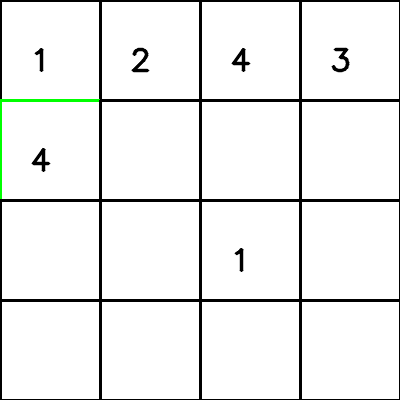

Step 7: Taking action (1, 1, 3)


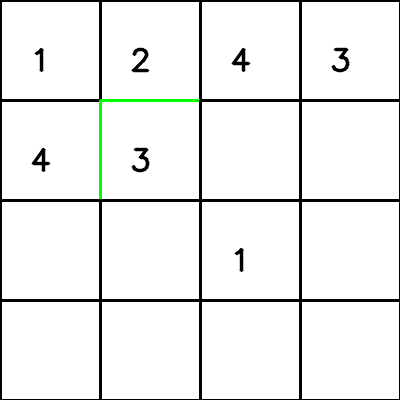

Step 8: Taking action (1, 2, 2)


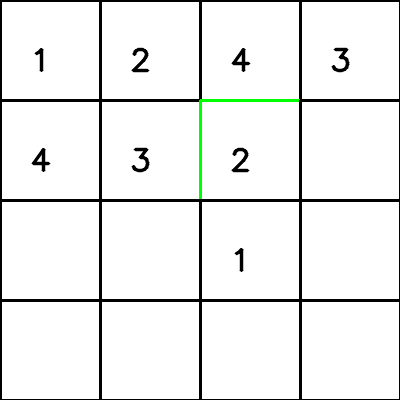

Step 9: Taking action (1, 3, 1)


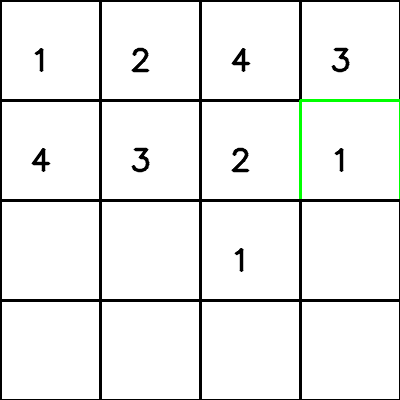

Step 10: Taking action (2, 0, 2)


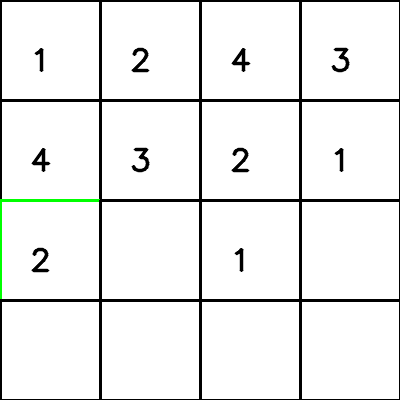

Step 11: Taking action (2, 1, 4)


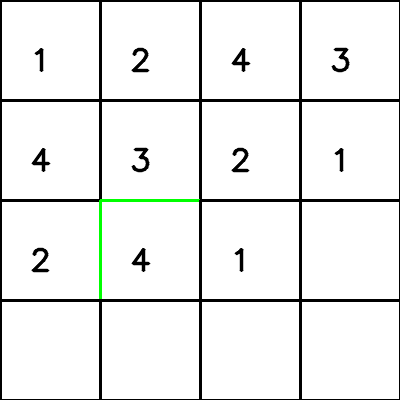

Step 12: Taking action (3, 0, 3)


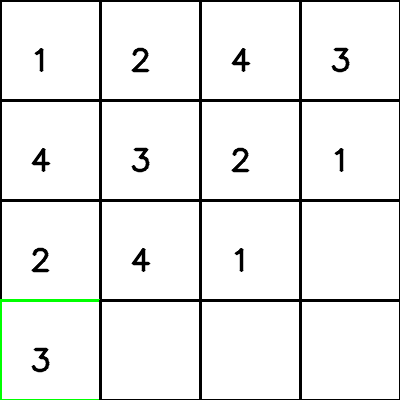

Step 13: Taking action (3, 1, 1)


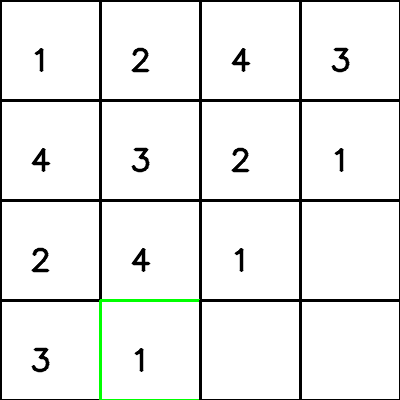

Step 14: Taking action (3, 3, 2)


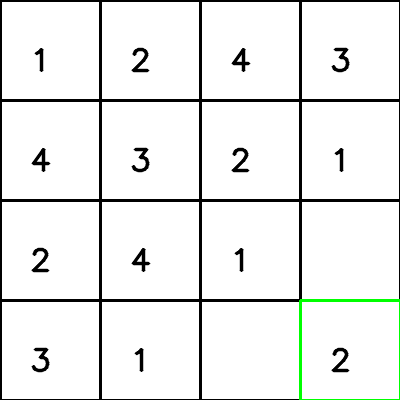

Step 15: No valid actions left!
Sudoku Solved!


In [8]:
import random
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Function to draw Sudoku puzzle
def draw_grid(state, last_move=None):
    img = np.ones((400, 400, 3), dtype=np.uint8) * 255  # White background
    cell_size = 100
    font = cv2.FONT_HERSHEY_SIMPLEX
    for i in range(4):
        for j in range(4):
            x = j * cell_size
            y = i * cell_size
            cv2.rectangle(img, (x, y), (x + cell_size, y + cell_size), (0, 0, 0), 2)
            if state[i][j] != 0:
                cv2.putText(img, str(state[i][j]), (x + 30, y + 70), font, 1, (0, 0, 0), 2, cv2.LINE_AA)
            if last_move and (i, j) == last_move:
                cv2.rectangle(img, (x, y), (x + cell_size, y + cell_size), (0, 255, 0), 2)  # Highlight last move
    return img

# Real-Time Solver
def solve_sudoku_real_time(state):
    step = 1
    while not sudoku_mdp.is_goal_state(state):
        possible_actions = sudoku_mdp.generate_actions(state)
        if not possible_actions:
            print(f"Step {step}: No valid actions left!")
            break

        hashable_state = tuple(map(tuple, state))

        best_action = max(possible_actions, key=lambda a: agent.Q[(hashable_state, a)])  # Select best action using Q-values
        print(f"Step {step}: Taking action {best_action}")
        state = sudoku_mdp.T(state, best_action)

        # Highlight the move and display the grid
        last_move = (best_action[0], best_action[1])
        frame = draw_grid(state, last_move)
        cv2_imshow(frame)  # Use cv2_imshow for displaying in Colab
        step += 1

    print("Sudoku Solved!")

# Run the real-time solver
solve_sudoku_real_time([row[:] for row in initial_state])


In [14]:
import random
import cv2
import numpy as np

# Function to draw the Sudoku puzzle
def draw_grid(state, last_move=None):
    img = np.ones((400, 400, 3), dtype=np.uint8) * 255  # White background
    cell_size = 100
    font = cv2.FONT_HERSHEY_SIMPLEX
    for i in range(4):
        for j in range(4):
            x = j * cell_size
            y = i * cell_size
            cv2.rectangle(img, (x, y), (x + cell_size, y + cell_size), (0, 0, 0), 2)
            if state[i][j] != 0:
                cv2.putText(img, str(state[i][j]), (x + 30, y + 70), font, 1, (0, 0, 0), 2, cv2.LINE_AA)
            if last_move and (i, j) == last_move:
                cv2.rectangle(img, (x, y), (x + cell_size, y + cell_size), (0, 255, 0), 2)  # Highlight last move
    return img

# Function to save the frames as a video
def create_video(state, video_filename="sudoku_solution.mp4"):
    # Initialize video writer
    fps = 2  # 2 FPS for 0.5 seconds per frame
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
    out = cv2.VideoWriter(video_filename, fourcc, fps, (400, 400))

    step = 1
    while not sudoku_mdp.is_goal_state(state):
        possible_actions = sudoku_mdp.generate_actions(state)
        if not possible_actions:
            print(f"Step {step}: No valid actions left!")
            break

        # Convert the state to a tuple to make it hashable
        hashable_state = tuple(map(tuple, state))

        best_action = max(possible_actions, key=lambda a: agent.Q[(hashable_state, a)])  # Select best action using Q-values
        print(f"Step {step}: Taking action {best_action}")
        state = sudoku_mdp.T(state, best_action)

        # Highlight the move and capture the frame
        last_move = (best_action[0], best_action[1])
        frame = draw_grid(state, last_move)

        # Write the frame to the video
        out.write(frame)
        step += 1

    out.release()
    print("Sudoku Solved! Video created.")

# Initial Sudoku state
initial_state = (
    (0, 0, 0, 0),
    (0, 0, 0, 0),
    (0, 0, 0, 0),
    (0, 0, 0, 0),
)

sudoku_mdp = SudokuMDP(initial_state)
agent = QLearningAgent(sudoku_mdp)

train_agent(agent, sudoku_mdp, episodes=1000)

create_video([row[:] for row in initial_state])


Episode 0: Training in progress.
Episode 100: Training in progress.
Episode 200: Training in progress.
Episode 300: Training in progress.
Episode 400: Training in progress.
Episode 500: Training in progress.
Episode 600: Training in progress.
Episode 700: Training in progress.
Episode 800: Training in progress.
Episode 900: Training in progress.
Training complete.
Step 1: Taking action (2, 0, 4)
Step 2: Taking action (0, 3, 4)
Step 3: Taking action (0, 0, 1)
Step 4: Taking action (0, 1, 2)
Step 5: Taking action (0, 2, 3)
Step 6: Taking action (1, 0, 3)
Step 7: Taking action (1, 1, 4)
Step 8: Taking action (1, 2, 1)
Step 9: Taking action (2, 1, 1)
Step 10: Taking action (2, 3, 2)
Step 11: Taking action (3, 1, 3)
Step 12: Taking action (3, 0, 2)
Step 13: Taking action (3, 3, 1)
Step 14: Taking action (3, 2, 4)
Step 15: No valid actions left!
Sudoku Solved! Video created.
